In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from collections import Counter
import pickle

In [3]:
dataset_path_fusion = "C:\\Users\\hp-pc\\Desktop\\GRP\\sim_data\\fusion\\fusion_total\\fusion_total.csv"

In [4]:
df_fusion = pd.read_csv(dataset_path_fusion, index_col=False)

In [5]:
df_fusion

,time,windvx,windvy,con,detection,posx,posy,yaw,V,yaw_c,Declare,Time_out,Termination
0,0,1.062430,-0.000094,0.095689,1,82.938000,-2.69365,-111.559,1.000280,-180.0050,0,0,0
1,1,1.066280,-0.000175,0.122268,1,82.469800,-3.57635,-134.588,0.999740,-180.0090,0,0,0
2,2,1.069730,-0.000267,0.123117,1,81.735800,-4.27575,-154.369,0.999860,-180.0140,0,0,0
3,3,1.073390,-0.000367,0.106525,1,80.851800,-4.75450,-162.096,0.999944,-180.0200,0,0,0
4,4,1.077840,-0.000486,0.118507,1,79.910500,-5.09579,-165.942,0.999946,-260.0260,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,364,0.630438,-0.117440,0.000000,0,3.290700,-52.00920,-128.677,1.500000,-211.1820,0,0,0
1048571,365,0.660376,-0.129518,0.000000,0,2.273180,-53.11420,-151.143,1.500000,-233.6480,0,0,0
1048572,366,0.694449,-0.142095,0.000000,0,0.910623,-53.74650,-173.609,1.500000,-256.1140,0,0,0
1048573,367,0.726198,-0.153114,0.000000,0,-0.590151,-53.81010,163.926,1.500000,81.4201,0,0,0


In [6]:
df_fusion = df_fusion.dropna()

In [7]:
df_fusion

,time,windvx,windvy,con,detection,posx,posy,yaw,V,yaw_c,Declare,Time_out,Termination
0,0,1.062430,-0.000094,0.095689,1,82.938000,-2.69365,-111.559,1.000280,-180.0050,0,0,0
1,1,1.066280,-0.000175,0.122268,1,82.469800,-3.57635,-134.588,0.999740,-180.0090,0,0,0
2,2,1.069730,-0.000267,0.123117,1,81.735800,-4.27575,-154.369,0.999860,-180.0140,0,0,0
3,3,1.073390,-0.000367,0.106525,1,80.851800,-4.75450,-162.096,0.999944,-180.0200,0,0,0
4,4,1.077840,-0.000486,0.118507,1,79.910500,-5.09579,-165.942,0.999946,-260.0260,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,364,0.630438,-0.117440,0.000000,0,3.290700,-52.00920,-128.677,1.500000,-211.1820,0,0,0
1048571,365,0.660376,-0.129518,0.000000,0,2.273180,-53.11420,-151.143,1.500000,-233.6480,0,0,0
1048572,366,0.694449,-0.142095,0.000000,0,0.910623,-53.74650,-173.609,1.500000,-256.1140,0,0,0
1048573,367,0.726198,-0.153114,0.000000,0,-0.590151,-53.81010,163.926,1.500000,81.4201,0,0,0


In [8]:
num_trial = len(df_fusion[df_fusion['Termination'] == 1])

In [9]:
num_trial

11931

In [10]:
df_fusion

,time,windvx,windvy,con,detection,posx,posy,yaw,V,yaw_c,Declare,Time_out,Termination
0,0,1.062430,-0.000094,0.095689,1,82.938000,-2.69365,-111.559,1.000280,-180.0050,0,0,0
1,1,1.066280,-0.000175,0.122268,1,82.469800,-3.57635,-134.588,0.999740,-180.0090,0,0,0
2,2,1.069730,-0.000267,0.123117,1,81.735800,-4.27575,-154.369,0.999860,-180.0140,0,0,0
3,3,1.073390,-0.000367,0.106525,1,80.851800,-4.75450,-162.096,0.999944,-180.0200,0,0,0
4,4,1.077840,-0.000486,0.118507,1,79.910500,-5.09579,-165.942,0.999946,-260.0260,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,364,0.630438,-0.117440,0.000000,0,3.290700,-52.00920,-128.677,1.500000,-211.1820,0,0,0
1048571,365,0.660376,-0.129518,0.000000,0,2.273180,-53.11420,-151.143,1.500000,-233.6480,0,0,0
1048572,366,0.694449,-0.142095,0.000000,0,0.910623,-53.74650,-173.609,1.500000,-256.1140,0,0,0
1048573,367,0.726198,-0.153114,0.000000,0,-0.590151,-53.81010,163.926,1.500000,81.4201,0,0,0


In [11]:
num_trial

11931

In [12]:
num_D_trial = len(df_fusion[df_fusion['Declare'] == 1])

In [13]:
num_D_trial

10601

In [14]:
num_TO_trial = len(df_fusion[df_fusion['Time_out'] == 1])

In [15]:
num_TO_trial

1331

In [16]:
trial_start = []

In [17]:
trial_D_start = []

In [18]:
for i in range(df_fusion.shape[0]):
    if df_fusion['time'].iloc[i] == 0:
        trial_start.append(i)
    if df_fusion['Termination'].iloc[i] == 1:
        trial_D_start.append(i)

In [19]:
df_fusion.shape

(1048575, 13)

In [20]:
range(df_fusion.shape[0])

range(0, 1048575)

In [21]:
df_fusion

,time,windvx,windvy,con,detection,posx,posy,yaw,V,yaw_c,Declare,Time_out,Termination
0,0,1.062430,-0.000094,0.095689,1,82.938000,-2.69365,-111.559,1.000280,-180.0050,0,0,0
1,1,1.066280,-0.000175,0.122268,1,82.469800,-3.57635,-134.588,0.999740,-180.0090,0,0,0
2,2,1.069730,-0.000267,0.123117,1,81.735800,-4.27575,-154.369,0.999860,-180.0140,0,0,0
3,3,1.073390,-0.000367,0.106525,1,80.851800,-4.75450,-162.096,0.999944,-180.0200,0,0,0
4,4,1.077840,-0.000486,0.118507,1,79.910500,-5.09579,-165.942,0.999946,-260.0260,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,364,0.630438,-0.117440,0.000000,0,3.290700,-52.00920,-128.677,1.500000,-211.1820,0,0,0
1048571,365,0.660376,-0.129518,0.000000,0,2.273180,-53.11420,-151.143,1.500000,-233.6480,0,0,0
1048572,366,0.694449,-0.142095,0.000000,0,0.910623,-53.74650,-173.609,1.500000,-256.1140,0,0,0
1048573,367,0.726198,-0.153114,0.000000,0,-0.590151,-53.81010,163.926,1.500000,81.4201,0,0,0


In [22]:
trial_start

[0,
 47,
 94,
 208,
 258,
 320,
 382,
 452,
 588,
 598,
 608,
 622,
 636,
 657,
 678,
 699,
 720,
 751,
 782,
 821,
 860,
 877,
 894,
 911,
 936,
 961,
 986,
 1038,
 1090,
 1116,
 1144,
 1172,
 1200,
 1249,
 1290,
 1331,
 1362,
 1393,
 1501,
 1564,
 1627,
 1803,
 1875,
 1947,
 2005,
 2064,
 2123,
 2206,
 2327,
 2390,
 2401,
 2402,
 2403,
 2404,
 2405,
 2406,
 2807,
 2847,
 2895,
 2994,
 3036,
 3086,
 3136,
 3194,
 3252,
 3253,
 3306,
 3359,
 3409,
 3460,
 3511,
 3567,
 3639,
 3711,
 3769,
 3819,
 3869,
 3933,
 3996,
 4059,
 4126,
 4173,
 4174,
 4485,
 4518,
 4519,
 4520,
 4643,
 4662,
 4932,
 4974,
 5042,
 5105,
 5168,
 5215,
 5308,
 5401,
 5461,
 5862,
 6263,
 6322,
 6359,
 6760,
 6782,
 6798,
 6810,
 6822,
 6834,
 6873,
 6912,
 6954,
 7012,
 7070,
 7108,
 7146,
 7218,
 7277,
 7336,
 7413,
 7421,
 7482,
 7552,
 7657,
 7780,
 7858,
 7962,
 8057,
 8173,
 8188,
 8589,
 8627,
 8665,
 8704,
 8743,
 8786,
 8823,
 8860,
 8898,
 8936,
 8974,
 9021,
 9068,
 9100,
 9132,
 9176,
 9220,
 9347,
 9

In [23]:
trial_D_start

[46,
 93,
 207,
 257,
 319,
 381,
 451,
 597,
 607,
 621,
 635,
 656,
 677,
 698,
 719,
 750,
 781,
 820,
 859,
 876,
 893,
 910,
 935,
 960,
 985,
 1037,
 1089,
 1115,
 1143,
 1171,
 1199,
 1248,
 1289,
 1330,
 1361,
 1392,
 1500,
 1563,
 1626,
 1802,
 1874,
 1946,
 2004,
 2063,
 2122,
 2205,
 2326,
 2389,
 2400,
 2401,
 2402,
 2403,
 2404,
 2405,
 2806,
 2846,
 2894,
 2993,
 3035,
 3085,
 3135,
 3193,
 3251,
 3252,
 3305,
 3358,
 3408,
 3459,
 3510,
 3566,
 3638,
 3710,
 3768,
 3818,
 3868,
 3932,
 3995,
 4058,
 4125,
 4172,
 4173,
 4484,
 4517,
 4518,
 4519,
 4642,
 4661,
 4931,
 4973,
 5041,
 5104,
 5167,
 5214,
 5307,
 5400,
 5460,
 5861,
 6262,
 6321,
 6358,
 6759,
 6781,
 6797,
 6809,
 6821,
 6833,
 6872,
 6911,
 6953,
 7011,
 7069,
 7107,
 7145,
 7217,
 7276,
 7335,
 7412,
 7420,
 7481,
 7551,
 7656,
 7779,
 7857,
 7961,
 8056,
 8172,
 8187,
 8588,
 8626,
 8664,
 8703,
 8742,
 8785,
 8822,
 8859,
 8897,
 8935,
 8973,
 9020,
 9067,
 9099,
 9131,
 9175,
 9219,
 9346,
 9398,
 9450

In [24]:
trial_D_start[-1]

1048205

In [25]:

df_fusion.pop('Declare')


0          0
1          0
2          0
3          0
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: Declare, Length: 1048575, dtype: int64

In [26]:
df_fusion

,time,windvx,windvy,con,detection,posx,posy,yaw,V,yaw_c,Time_out,Termination
0,0,1.062430,-0.000094,0.095689,1,82.938000,-2.69365,-111.559,1.000280,-180.0050,0,0
1,1,1.066280,-0.000175,0.122268,1,82.469800,-3.57635,-134.588,0.999740,-180.0090,0,0
2,2,1.069730,-0.000267,0.123117,1,81.735800,-4.27575,-154.369,0.999860,-180.0140,0,0
3,3,1.073390,-0.000367,0.106525,1,80.851800,-4.75450,-162.096,0.999944,-180.0200,0,0
4,4,1.077840,-0.000486,0.118507,1,79.910500,-5.09579,-165.942,0.999946,-260.0260,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,364,0.630438,-0.117440,0.000000,0,3.290700,-52.00920,-128.677,1.500000,-211.1820,0,0
1048571,365,0.660376,-0.129518,0.000000,0,2.273180,-53.11420,-151.143,1.500000,-233.6480,0,0
1048572,366,0.694449,-0.142095,0.000000,0,0.910623,-53.74650,-173.609,1.500000,-256.1140,0,0
1048573,367,0.726198,-0.153114,0.000000,0,-0.590151,-53.81010,163.926,1.500000,81.4201,0,0


In [27]:
df_fusion.pop('Termination')
df_fusion.pop('Time_out')
df_fusion.pop('time')
df_fusion.pop('posx')
df_fusion.pop('posy')
df_fusion.pop('yaw')
df_fusion.pop('V')

0          1.000280
1          0.999740
2          0.999860
3          0.999944
4          0.999946
             ...   
1048570    1.500000
1048571    1.500000
1048572    1.500000
1048573    1.500000
1048574    1.500000
Name: V, Length: 1048575, dtype: float64

In [28]:
df_fusion

,windvx,windvy,con,detection,yaw_c
0,1.062430,-0.000094,0.095689,1,-180.0050
1,1.066280,-0.000175,0.122268,1,-180.0090
2,1.069730,-0.000267,0.123117,1,-180.0140
3,1.073390,-0.000367,0.106525,1,-180.0200
4,1.077840,-0.000486,0.118507,1,-260.0260
...,...,...,...,...,...
1048570,0.630438,-0.117440,0.000000,0,-211.1820
1048571,0.660376,-0.129518,0.000000,0,-233.6480
1048572,0.694449,-0.142095,0.000000,0,-256.1140
1048573,0.726198,-0.153114,0.000000,0,81.4201


In [29]:
# convert negative yaw command to positive

def change_yaw(x):
    if x < 0:
        x += 360
    return x

In [30]:
df_fusion

,windvx,windvy,con,detection,yaw_c
0,1.062430,-0.000094,0.095689,1,-180.0050
1,1.066280,-0.000175,0.122268,1,-180.0090
2,1.069730,-0.000267,0.123117,1,-180.0140
3,1.073390,-0.000367,0.106525,1,-180.0200
4,1.077840,-0.000486,0.118507,1,-260.0260
...,...,...,...,...,...
1048570,0.630438,-0.117440,0.000000,0,-211.1820
1048571,0.660376,-0.129518,0.000000,0,-233.6480
1048572,0.694449,-0.142095,0.000000,0,-256.1140
1048573,0.726198,-0.153114,0.000000,0,81.4201


In [31]:
df_fusion['yaw_c'] = df_fusion['yaw_c'].apply(change_yaw)

In [32]:
df_fusion

,windvx,windvy,con,detection,yaw_c
0,1.062430,-0.000094,0.095689,1,179.9950
1,1.066280,-0.000175,0.122268,1,179.9910
2,1.069730,-0.000267,0.123117,1,179.9860
3,1.073390,-0.000367,0.106525,1,179.9800
4,1.077840,-0.000486,0.118507,1,99.9740
...,...,...,...,...,...
1048570,0.630438,-0.117440,0.000000,0,148.8180
1048571,0.660376,-0.129518,0.000000,0,126.3520
1048572,0.694449,-0.142095,0.000000,0,103.8860
1048573,0.726198,-0.153114,0.000000,0,81.4201


In [33]:
yaw_c1 = df_fusion.pop("yaw_c")

In [34]:
df_fusion

,windvx,windvy,con,detection
0,1.062430,-0.000094,0.095689,1
1,1.066280,-0.000175,0.122268,1
2,1.069730,-0.000267,0.123117,1
3,1.073390,-0.000367,0.106525,1
4,1.077840,-0.000486,0.118507,1
...,...,...,...,...
1048570,0.630438,-0.117440,0.000000,0
1048571,0.660376,-0.129518,0.000000,0
1048572,0.694449,-0.142095,0.000000,0
1048573,0.726198,-0.153114,0.000000,0


In [35]:
yaw_c2 = yaw_c1 * np.pi / 180

In [36]:
yaw_c2

0          3.141505
1          3.141436
2          3.141348
3          3.141244
4          1.744875
             ...   
1048570    2.597364
1048571    2.205258
1048572    1.813153
1048573    1.421049
1048574    1.028945
Name: yaw_c, Length: 1048575, dtype: float64

In [37]:
df_fusion['Cx'] = np.cos(yaw_c2)
df_fusion['Cy'] = np.sin(yaw_c2)

In [38]:
df_fusion

,windvx,windvy,con,detection,Cx,Cy
0,1.062430,-0.000094,0.095689,1,-1.000000,0.000087
1,1.066280,-0.000175,0.122268,1,-1.000000,0.000157
2,1.069730,-0.000267,0.123117,1,-1.000000,0.000244
3,1.073390,-0.000367,0.106525,1,-1.000000,0.000349
4,1.077840,-0.000486,0.118507,1,-0.173201,0.984886
...,...,...,...,...,...,...
1048570,0.630438,-0.117440,0.000000,0,-0.855527,0.517758
1048571,0.660376,-0.129518,0.000000,0,-0.592744,0.805391
1048572,0.694449,-0.142095,0.000000,0,-0.239991,0.970775
1048573,0.726198,-0.153114,0.000000,0,0.149188,0.988809


In [39]:
num_features = df_fusion.shape[1]

In [40]:
num_features

6

In [41]:
num_features = df_fusion.shape[0]

In [42]:
num_features

1048575

In [43]:
df_fusion.shape

(1048575, 6)

In [44]:
mean = df_fusion.mean()
std = df_fusion.std()
df_moth = (df_fusion - mean) / std

In [45]:
mean

windvx       1.051779
windvy       0.008348
con          0.095592
detection    0.291907
Cx          -0.199327
Cy          -0.055782
dtype: float64

In [46]:
std

windvx       0.601886
windvy       0.301178
con          0.416462
detection    0.454640
Cx           0.702785
Cy           0.680626
dtype: float64

In [47]:
df_fusion

,windvx,windvy,con,detection,Cx,Cy
0,1.062430,-0.000094,0.095689,1,-1.000000,0.000087
1,1.066280,-0.000175,0.122268,1,-1.000000,0.000157
2,1.069730,-0.000267,0.123117,1,-1.000000,0.000244
3,1.073390,-0.000367,0.106525,1,-1.000000,0.000349
4,1.077840,-0.000486,0.118507,1,-0.173201,0.984886
...,...,...,...,...,...,...
1048570,0.630438,-0.117440,0.000000,0,-0.855527,0.517758
1048571,0.660376,-0.129518,0.000000,0,-0.592744,0.805391
1048572,0.694449,-0.142095,0.000000,0,-0.239991,0.970775
1048573,0.726198,-0.153114,0.000000,0,0.149188,0.988809


In [48]:
train_df = df_fusion[0:int(len(df_fusion) * 0.8)]

In [49]:
train_df

,windvx,windvy,con,detection,Cx,Cy
0,1.06243,-0.000094,0.095689,1,-1.000000,0.000087
1,1.06628,-0.000175,0.122268,1,-1.000000,0.000157
2,1.06973,-0.000267,0.123117,1,-1.000000,0.000244
3,1.07339,-0.000367,0.106525,1,-1.000000,0.000349
4,1.07784,-0.000486,0.118507,1,-0.173201,0.984886
...,...,...,...,...,...,...
838855,0.88060,-0.155987,0.000000,0,0.837977,-0.545706
838856,0.95039,-0.143681,0.000000,0,0.565848,-0.824510
838857,1.02981,-0.128578,0.000000,0,0.207831,-0.978165
838858,1.09614,-0.113925,0.000000,0,-0.181738,-0.983347


In [50]:
int(len(df_fusion) * 0.9)
    

943717

In [51]:
train_df = df_fusion[0:int(len(df_fusion) * 0.8)]
val_df = df_fusion[int(len(df_fusion) * 0.8):int(len(df_fusion) * 0.9)]
test_df = df_fusion[int(len(df_fusion) * 0.9):]

In [52]:
train_df

,windvx,windvy,con,detection,Cx,Cy
0,1.06243,-0.000094,0.095689,1,-1.000000,0.000087
1,1.06628,-0.000175,0.122268,1,-1.000000,0.000157
2,1.06973,-0.000267,0.123117,1,-1.000000,0.000244
3,1.07339,-0.000367,0.106525,1,-1.000000,0.000349
4,1.07784,-0.000486,0.118507,1,-0.173201,0.984886
...,...,...,...,...,...,...
838855,0.88060,-0.155987,0.000000,0,0.837977,-0.545706
838856,0.95039,-0.143681,0.000000,0,0.565848,-0.824510
838857,1.02981,-0.128578,0.000000,0,0.207831,-0.978165
838858,1.09614,-0.113925,0.000000,0,-0.181738,-0.983347


In [53]:
# define the window_generator function
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df, val_df, test_df,
                 label_columns=None,
                 input_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        self.input_columns = input_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Input column names: {self.input_columns}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)
        if self.input_columns is not None:
            inputs = tf.stack([inputs[:, :, self.column_indices[name]] for name in self.input_columns],axis=-1)


        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            #shuffle=True,
            batch_size=32, )

        ds = ds.map(self.split_window)

        return ds

    # convert DataFrame into Dataset
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    # fetch an example batch for plotting
    def example(self):
        # by default, call example function returns None
        result = getattr(self, '_example', None)
        if result is None:
            # no example batch was found, so get one from the '.train' dataset
            # iter: creates an iterator object
            result = next(iter(self.train))
            # and cache it for the next time
            self._example = result

        return result

In [80]:
# deffine a function to train the models
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=20):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history

In [81]:
columns = df_fusion.columns
label_columns = ['Cx', 'Cy']
input_columns = list((Counter(columns) - Counter(label_columns)).elements())
num_inputs = len(input_columns)

In [82]:
Counter(columns)

Counter({'windvx': 1, 'windvy': 1, 'con': 1, 'detection': 1, 'Cx': 1, 'Cy': 1})

In [83]:
Counter(label_columns)

Counter({'Cx': 1, 'Cy': 1})

In [84]:
Counter(columns) - Counter(label_columns)

Counter({'windvx': 1, 'windvy': 1, 'con': 1, 'detection': 1})

In [85]:
columns

Index(['windvx', 'windvy', 'con', 'detection', 'Cx', 'Cy'], dtype='object')

In [86]:
label_columns

['Cx', 'Cy']

In [87]:
input_columns

['windvx', 'windvy', 'con', 'detection']

In [88]:
num_inputs

4

In [92]:
filter_size = 64

    # RNN model
lstm_model = tf.keras.models.Sequential([
        # Shape [batch, time, features] => [batch, time, lstm_units]
        #tf.keras.layers.LSTM(256, return_sequences=True),
        #tf.keras.layers.LSTM(256, return_sequences=True),
        tf.keras.layers.LSTM(64, return_sequences=True),
        # Shape => [batch, time, features]
        tf.keras.layers.Dense(units=filter_size, activation='relu'),
        tf.keras.layers.Dense(units=filter_size, activation='relu'),
        tf.keras.layers.Dense(units=2)
    ])

In [93]:
CONV_WIDTH = 6

lstm_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=CONV_WIDTH,
    shift=0,
    train_df=train_df,
    test_df=test_df,
    val_df=val_df,
    label_columns=label_columns,
    input_columns=input_columns
)

In [94]:
# train the lstm model


history = compile_and_fit(lstm_model, lstm_window)
val_performance = lstm_model.evaluate(lstm_window.test)
print(val_performance, sum(val_performance))


Epoch 1/20
26215/26215 [==============================] - 195s 7ms/step - loss: 0.4137 - mean_absolute_error: 0.5519 - val_loss: 0.4570 - val_mean_absolute_error: 0.5979
Epoch 2/20
26215/26215 [==============================] - 181s 7ms/step - loss: 0.4090 - mean_absolute_error: 0.5457 - val_loss: 0.4561 - val_mean_absolute_error: 0.5969
Epoch 3/20
26215/26215 [==============================] - 181s 7ms/step - loss: 0.4074 - mean_absolute_error: 0.5436 - val_loss: 0.4556 - val_mean_absolute_error: 0.5962
Epoch 4/20
26215/26215 [==============================] - 174s 7ms/step - loss: 0.4065 - mean_absolute_error: 0.5425 - val_loss: 0.4550 - val_mean_absolute_error: 0.5955
Epoch 5/20
26215/26215 [==============================] - 164s 6ms/step - loss: 0.4058 - mean_absolute_error: 0.5417 - val_loss: 0.4544 - val_mean_absolute_error: 0.5948
Epoch 6/20
26215/26215 [==============================] - 162s 6ms/step - loss: 0.4051 - mean_absolute_error: 0.5407 - val_loss: 0.4538 - val_mean_abs

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/hp-pc/Desktop/GRP/fusion/sim_data/fusion/mean.txt'

In [96]:
model_selection = 'RNN'
dataset = 'fusion'
model_path = "C:/Users/hp-pc/Desktop/GRP/{}/sim_data/{}/".format(model_selection, dataset)
mean_path = 'C:/Users/hp-pc/Desktop/GRP/{}/sim_data/{}/'.format(model_selection, dataset)

lstm_model.save(model_path+'rnn_nocon.h5',
                include_optimizer=False)
# save train_mean and train_std
np.savetxt(mean_path+'mean.txt', mean)
np.savetxt(mean_path+'std.txt', std)

In [97]:
    val_performance = {}

In [98]:
    performance = {}

In [101]:


    val_performance['Conv'] = lstm_model.evaluate(lstm_window.val)

3277/3277 [==============================] - 12s 4ms/step - loss: 0.4420 - mean_absolute_error: 0.5805


TransferLearning

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [103]:
dataset_path2 = "C:\\Users\\hp-pc\\Desktop\\GRP\\real_data\\fusion\\fusion_total\\fusion_total.csv"

In [104]:
df_fusion_real = pd.read_csv(dataset_path2, index_col=False)

In [105]:
df_fusion_real

,time,posx,posy,con,detection,windv,winddir,yaw_c,yaw,yaw_error
0,1,-0.841689,0.063499,0.0,0,0.00,180.000000,20.000000,-26.419603,-46.419603
1,2,-0.837154,0.059510,565.0,1,0.69,-101.866942,20.000000,-27.866942,-47.866942
2,3,-0.835682,0.058023,562.0,1,1.25,-105.417687,20.000000,-28.417687,-48.417687
3,4,-0.791613,0.040428,582.0,0,1.01,-102.905376,20.000000,-21.905376,-41.905376
4,5,-0.750289,0.045876,567.0,1,0.89,-94.993614,20.000000,-8.993614,-28.993614
...,...,...,...,...,...,...,...,...,...,...
28464,68,-0.680270,-0.725390,642.0,0,1.63,126.753343,-67.665235,-74.246657,-6.581422
28465,69,-0.667918,-0.760249,652.0,0,2.38,117.149818,-67.665235,-73.850182,-6.184947
28466,70,-0.653904,-0.798121,635.0,0,1.49,113.611592,-67.665235,-73.388408,-5.723173
28467,71,-0.642391,-0.828852,627.0,0,1.50,99.991336,-67.665235,-73.008664,-5.343430


Preprocessing & Cleansing

In [106]:
df_fusion_real = df_fusion_real.dropna()

In [107]:
df_fusion_real

,time,posx,posy,con,detection,windv,winddir,yaw_c,yaw,yaw_error
0,1,-0.841689,0.063499,0.0,0,0.00,180.000000,20.000000,-26.419603,-46.419603
1,2,-0.837154,0.059510,565.0,1,0.69,-101.866942,20.000000,-27.866942,-47.866942
2,3,-0.835682,0.058023,562.0,1,1.25,-105.417687,20.000000,-28.417687,-48.417687
3,4,-0.791613,0.040428,582.0,0,1.01,-102.905376,20.000000,-21.905376,-41.905376
4,5,-0.750289,0.045876,567.0,1,0.89,-94.993614,20.000000,-8.993614,-28.993614
...,...,...,...,...,...,...,...,...,...,...
28464,68,-0.680270,-0.725390,642.0,0,1.63,126.753343,-67.665235,-74.246657,-6.581422
28465,69,-0.667918,-0.760249,652.0,0,2.38,117.149818,-67.665235,-73.850182,-6.184947
28466,70,-0.653904,-0.798121,635.0,0,1.49,113.611592,-67.665235,-73.388408,-5.723173
28467,71,-0.642391,-0.828852,627.0,0,1.50,99.991336,-67.665235,-73.008664,-5.343430


In [108]:
df_fusion_real.pop('time')
df_fusion_real.pop('posx')
df_fusion_real.pop('posy')
df_fusion_real.pop('yaw')
df_fusion_real.pop('yaw_error')

0       -46.419603
1       -47.866942
2       -48.417687
3       -41.905376
4       -28.993614
           ...    
28464    -6.581422
28465    -6.184947
28466    -5.723173
28467    -5.343430
28468    -5.063220
Name: yaw_error, Length: 28469, dtype: float64

In [109]:
df_fusion_real

,con,detection,windv,winddir,yaw_c
0,0.0,0,0.00,180.000000,20.000000
1,565.0,1,0.69,-101.866942,20.000000
2,562.0,1,1.25,-105.417687,20.000000
3,582.0,0,1.01,-102.905376,20.000000
4,567.0,1,0.89,-94.993614,20.000000
...,...,...,...,...,...
28464,642.0,0,1.63,126.753343,-67.665235
28465,652.0,0,2.38,117.149818,-67.665235
28466,635.0,0,1.49,113.611592,-67.665235
28467,627.0,0,1.50,99.991336,-67.665235


In [110]:
def change_yaw(x):
    if x < 0:
        x += 360
    return x

In [111]:
df_fusion_real['yaw_c'] = df_fusion_real['yaw_c'].apply(change_yaw)

In [112]:
df_fusion_real

,con,detection,windv,winddir,yaw_c
0,0.0,0,0.00,180.000000,20.000000
1,565.0,1,0.69,-101.866942,20.000000
2,562.0,1,1.25,-105.417687,20.000000
3,582.0,0,1.01,-102.905376,20.000000
4,567.0,1,0.89,-94.993614,20.000000
...,...,...,...,...,...
28464,642.0,0,1.63,126.753343,292.334765
28465,652.0,0,2.38,117.149818,292.334765
28466,635.0,0,1.49,113.611592,292.334765
28467,627.0,0,1.50,99.991336,292.334765


In [113]:
yaw_c_real = df_fusion_real.pop("yaw_c")

In [114]:
df_fusion_real

,con,detection,windv,winddir
0,0.0,0,0.00,180.000000
1,565.0,1,0.69,-101.866942
2,562.0,1,1.25,-105.417687
3,582.0,0,1.01,-102.905376
4,567.0,1,0.89,-94.993614
...,...,...,...,...
28464,642.0,0,1.63,126.753343
28465,652.0,0,2.38,117.149818
28466,635.0,0,1.49,113.611592
28467,627.0,0,1.50,99.991336


In [115]:
yaw_c_real = yaw_c_real * np.pi / 180 # deg to rad

In [116]:
df_fusion_real['Cx'] = np.cos(yaw_c_real)
df_fusion_real['Cy'] = np.sin(yaw_c_real)

In [117]:
df_fusion_real

,con,detection,windv,winddir,Cx,Cy
0,0.0,0,0.00,180.000000,0.939693,0.342020
1,565.0,1,0.69,-101.866942,0.939693,0.342020
2,562.0,1,1.25,-105.417687,0.939693,0.342020
3,582.0,0,1.01,-102.905376,0.939693,0.342020
4,567.0,1,0.89,-94.993614,0.939693,0.342020
...,...,...,...,...,...,...
28464,642.0,0,1.63,126.753343,0.380017,-0.924979
28465,652.0,0,2.38,117.149818,0.380017,-0.924979
28466,635.0,0,1.49,113.611592,0.380017,-0.924979
28467,627.0,0,1.50,99.991336,0.380017,-0.924979


In [118]:
def change_winddir(x):
    if x < 0:
        x += 360
    return x

In [119]:
df_fusion_real['winddir'] = df_fusion_real['winddir'].apply(change_winddir)

In [120]:
winddir = df_fusion_real.pop("winddir")

In [121]:
winddir = winddir * np.pi / 180

In [122]:
df_fusion_real['windvx'] = df_fusion_real['windv']*np.cos(winddir)
df_fusion_real['windvy'] = df_fusion_real['windv']*np.sin(winddir)


In [123]:
df_fusion_real

,con,detection,windv,Cx,Cy,windvx,windvy
0,0.0,0,0.00,0.939693,0.342020,-0.000000,0.000000
1,565.0,1,0.69,0.939693,0.342020,-0.141891,-0.675253
2,562.0,1,1.25,0.939693,0.342020,-0.332317,-1.205017
3,582.0,0,1.01,0.939693,0.342020,-0.225575,-0.984488
4,567.0,1,0.89,0.939693,0.342020,-0.077470,-0.886622
...,...,...,...,...,...,...,...
28464,642.0,0,1.63,0.380017,-0.924979,-0.975345,1.305987
28465,652.0,0,2.38,0.380017,-0.924979,-1.086039,2.117763
28466,635.0,0,1.49,0.380017,-0.924979,-0.596796,1.365260
28467,627.0,0,1.50,0.380017,-0.924979,-0.260249,1.477251


In [124]:
winddir = df_fusion_real.pop("windv")

In [125]:
df_fusion_real = df_fusion_real[['windvx', 'windvy', 'con', 'detection', 'Cx', 'Cy']]

In [126]:
df_fusion_real

,windvx,windvy,con,detection,Cx,Cy
0,-0.000000,0.000000,0.0,0,0.939693,0.342020
1,-0.141891,-0.675253,565.0,1,0.939693,0.342020
2,-0.332317,-1.205017,562.0,1,0.939693,0.342020
3,-0.225575,-0.984488,582.0,0,0.939693,0.342020
4,-0.077470,-0.886622,567.0,1,0.939693,0.342020
...,...,...,...,...,...,...
28464,-0.975345,1.305987,642.0,0,0.380017,-0.924979
28465,-1.086039,2.117763,652.0,0,0.380017,-0.924979
28466,-0.596796,1.365260,635.0,0,0.380017,-0.924979
28467,-0.260249,1.477251,627.0,0,0.380017,-0.924979


In [127]:
mean = df_fusion_real.mean()
std = df_fusion_real.std()
df_fusion_real = (df_fusion_real - mean) / std

In [128]:
df_fusion_real

,windvx,windvy,con,detection,Cx,Cy
0,0.363499,0.060933,-7.833490,-1.054989,1.538574,0.339115
1,-0.118817,-0.411710,-0.536947,0.947844,1.538574,0.339115
2,-0.766111,-0.782517,-0.575690,0.947844,1.538574,0.339115
3,-0.403274,-0.628158,-0.317405,-1.054989,1.538574,0.339115
4,0.100165,-0.559657,-0.511119,0.947844,1.538574,0.339115
...,...,...,...,...,...,...
28464,-2.951888,0.975057,0.457449,-1.054989,0.552548,-1.209606
28465,-3.328156,1.543258,0.586591,-1.054989,0.552548,-1.209606
28466,-1.665127,1.016545,0.367049,-1.054989,0.552548,-1.209606
28467,-0.521137,1.094933,0.263736,-1.054989,0.552548,-1.209606


In [129]:
train_df_real = df_fusion_real[0:int(len(df_fusion_real) * 0.8)]
val_df_real = df_fusion_real[int(len(df_fusion_real) * 0.8):int(len(df_fusion_real) * 0.9)]
test_df_real = df_fusion_real[int(len(df_fusion_real) * 0.9):]

In [131]:
lstm_window.trainable = False

In [133]:
# Let's take a look at the base model architecture
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 6, 64)             17664     
                                                                 
 dense_9 (Dense)             (None, 6, 64)             4160      
                                                                 
 dense_10 (Dense)            (None, 6, 64)             4160      
                                                                 
 dense_11 (Dense)            (None, 6, 2)              130       
                                                                 
Total params: 26,114
Trainable params: 26,114
Non-trainable params: 0
_________________________________________________________________


In [134]:
train_df_real.shape

(22775, 6)

In [135]:
prediction_layer = tf.keras.layers.Dense(2)

In [137]:
inputs = tf.keras.Input(shape=(6, 4))
#inputs=tf.Tensor(shape=(None, 6), dtype=tf.float32)
x = lstm_model(inputs, training=False)
#x = global_average_layer(x)
#x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [138]:

model.compile(optimizer='rmsprop',
        loss= 'mae',
         metrics=['acc'])

In [139]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6, 4)]            0         
                                                                 
 sequential_3 (Sequential)   (None, 6, 2)              26114     
                                                                 
 dense_12 (Dense)            (None, 6, 2)              6         
                                                                 
Total params: 26,120
Trainable params: 26,120
Non-trainable params: 0
_________________________________________________________________


In [140]:
len(model.trainable_variables)

11

In [142]:
history = compile_and_fit(model, lstm_window)

Epoch 1/20
26215/26215 [==============================] - 194s 7ms/step - loss: 0.3990 - mean_absolute_error: 0.5355 - val_loss: 0.4404 - val_mean_absolute_error: 0.5801
Epoch 2/20
26215/26215 [==============================] - 180s 7ms/step - loss: 0.3946 - mean_absolute_error: 0.5303 - val_loss: 0.4405 - val_mean_absolute_error: 0.5795
Epoch 3/20
26215/26215 [==============================] - 185s 7ms/step - loss: 0.3936 - mean_absolute_error: 0.5293 - val_loss: 0.4409 - val_mean_absolute_error: 0.5793
Epoch 4/20
26215/26215 [==============================] - 189s 7ms/step - loss: 0.3930 - mean_absolute_error: 0.5287 - val_loss: 0.4395 - val_mean_absolute_error: 0.5782
Epoch 5/20
26215/26215 [==============================] - 194s 7ms/step - loss: 0.3925 - mean_absolute_error: 0.5281 - val_loss: 0.4400 - val_mean_absolute_error: 0.5779
Epoch 6/20
26215/26215 [==============================] - 188s 7ms/step - loss: 0.3920 - mean_absolute_error: 0.5277 - val_loss: 0.4393 - val_mean_abs

In [145]:
val_performance = {}
performance = {}
val_performance['Conv'] = lstm_model.evaluate(lstm_window.val)

3277/3277 [==============================] - 12s 3ms/step - loss: 3.3163 - mean_absolute_error: 1.3957


In [146]:
acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

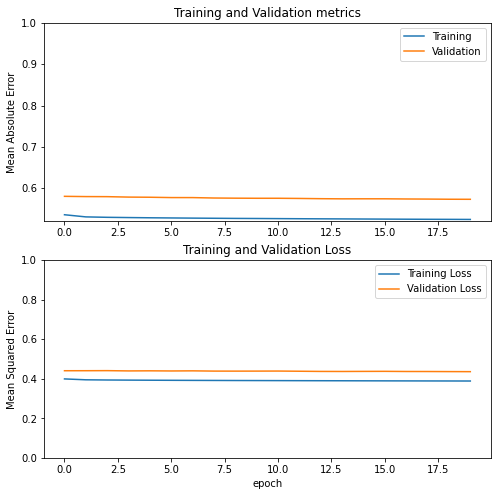

In [149]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend(loc='upper right')
plt.ylabel('Mean Absolute Error')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation metrics')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig("TL_Fusion_rnn.jpg")
plt.show()

Fine_Tuning

In [ ]:
conv_model.trainable = True

In [111]:
len(conv_model.layers)

6

In [112]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 2

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  6


In [113]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [114]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [148]:
    print(model.evaluate(lstm_window.test, verbose=0))
    model.save('C:\\Users\\hp-pc\\Desktop\\GRP\\Real-world test\\conv_fusion_{}.h5'.format(CONV_WIDTH), include_optimizer=False)

[0.43508124351501465, 0.5716778635978699]
